
Dealing with outliers using splines
===================================

Biharmonic spline interpolation is based on estimating vertical forces acting
on an elastic sheet that yield deformations in the sheet equal to the observed
data.
The results are equivalent to using ``verde.ScipyGridder(method='cubic')`` but
the interpolation is usually slower.
The advantage of using :class:`verde.Spline` is that you can assign weights to
the data to deal with large uncertainties or outliers.



In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# We need these two classes to set proper ticklabels for Cartopy maps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import pyproj
import numpy as np
import verde as vd

In [2]:
# We'll test this on the Baja California shipborne bathymetry data
data = vd.datasets.fetch_california_gps()
region = vd.get_region((data.longitude, data.latitude))

# Project the data using pyproj so that we can use it as input for the gridder.
# We'll set the latitude of true scale to the mean latitude of the data.
projection = pyproj.Proj(proj='merc', lat_ts=data.latitude.mean())
coordinates = projection(data.longitude.values, data.latitude.values)


# Now we can add some outliers to test our spline
outliers = np.random.RandomState(8).randint(0, data.velocity_up.size, size=10)
#data.velocity_up[outliers] += 6*data.std_up.max()
#data.std_up[outliers] = 6*data.std_up.max()

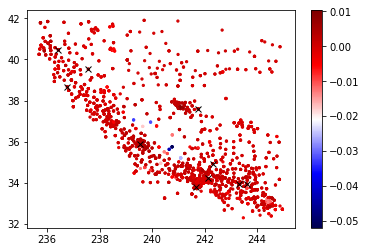

In [3]:
plt.scatter(data.longitude, data.latitude, c=data.velocity_up, cmap='seismic', s=5)
plt.plot(data.longitude[outliers], data.latitude[outliers], 'xk',
            label='Outliers')
plt.colorbar()

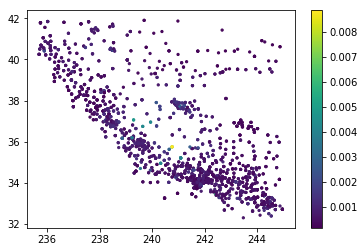

In [4]:
plt.scatter(data.longitude, data.latitude, c=data.std_up, s=5)
plt.colorbar()

In [5]:
def weights(std, normalize=False):
    std = np.atleast_1d(std)
    w = (std.min()/std)**2
    if normalize:
        w /= w.sum()
    return w
(weights(data.std_up, normalize=True)**2).sum()

0.0007686519161038436

In [6]:
w = weights(data.std_up)[:10]
w = 1e-15*np.ones(10)
w /= w.sum()
(w**2).sum()

0.09999999999999998

In [7]:
spacing = 10/60

In [8]:
c, d, w = vd.BlockReduce(np.average, spacing*511e3, std=True).filter(coordinates, data.velocity_up, 
                                                                     weights(data.std_up))

In [18]:
np.sqrt(w)

array([1.73134223e-04, 1.02342846e-03, 2.54453443e-03, 5.44172859e-05,
       8.28452588e-04, 1.24984525e-03, 2.82711602e-03, 4.20075577e-03,
       1.17545082e-03, 1.06177403e-03, 1.51036275e-03, 1.31871404e-03,
       9.93438839e-04, 7.20857826e-04, 1.59195420e-04, 3.77974495e-04,
       3.34685693e-03, 1.65433295e-03, 1.44267018e-03, 3.64358673e-04,
       4.68945217e-04, 2.17811002e-04, 1.61658912e-03, 1.49513091e-03,
       9.93337880e-03, 7.97643675e-04, 1.53354761e-03, 4.33842060e-04,
       2.90398148e-04, 6.73393045e-04, 1.58024850e-03, 2.09363779e-03,
       7.33378670e-03, 1.51368639e-04, 4.74954255e-04, 2.75876179e-04,
       1.30100417e-03, 5.42101086e-20, 7.04070490e-04, 3.30685515e-03,
       5.45052893e-03, 1.73048696e-03, 1.20214446e-03, 0.00000000e+00,
       2.07982551e-04, 3.81033590e-04, 5.98946792e-04, 1.65646958e-03,
       2.63577255e-04, 1.95696800e-03, 6.03154678e-04, 0.00000000e+00,
       5.42101086e-20, 5.30684547e-04, 1.50277443e-03, 4.49798869e-05,
      

In [10]:
np.nanmin(w)

0.0

In [11]:
np.nanmin(w)/w

/home/leo/miniconda3/envs/verde/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [12]:
w.min()/w

/home/leo/miniconda3/envs/verde/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

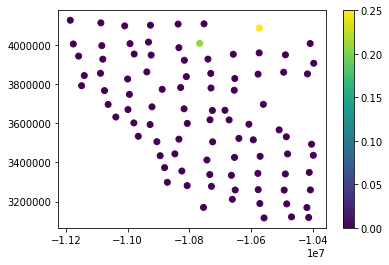

In [13]:
plt.scatter(c[0], c[1], c=w)
plt.colorbar()

In [14]:
c[0].shape, d.shape, w.shape

((93,), (93,), (93,))

In [15]:
spline = vd.Chain([('block', vd.BlockReduce(np.average, spacing*111e3)),
                   ('spline', vd.Spline())]).fit(coordinates, data.velocity_up)


# The weights only work if we use an approximate least-squares solution.
# This means that the spline won't be exact on the data points.
# The easiest way of doing this is to apply some damping regularization to
# smooth the solution.
spline_weights = vd.Chain([('block', vd.BlockReduce(np.average, spacing*111e3)),
                           ('spline', vd.Spline(damping=1e-8))]).fit(coordinates, data.velocity_up, 
                                                                     weights(data.std_up))

# We'll make two geographic grids, one for each spline, to compare the results
grids = [sp.grid(region=region, spacing=spacing, projection=projection,
                 dims=['latitude', 'longitude'], data_names=['velocity'])
         for sp in [spline, spline_weights]]


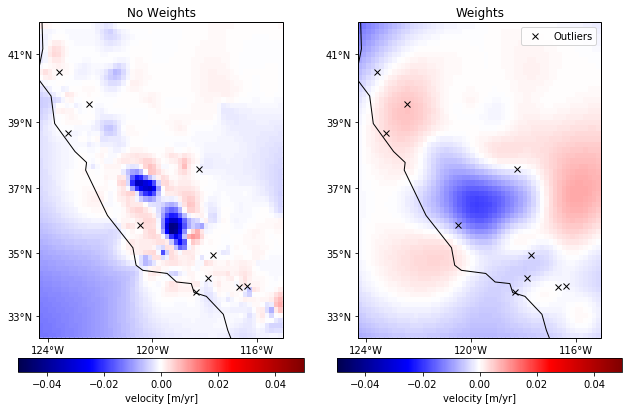

In [16]:

# Now we can plot the two grids side by side on Mercator maps
fig, axes = plt.subplots(1, 2, figsize=(9, 6),
                         subplot_kw=dict(projection=ccrs.Mercator()))
titles = ['No Weights', 'Weights']
crs = ccrs.PlateCarree()
for ax, title, grid in zip(axes, titles, grids):
    ax.set_title(title)
    pc = ax.pcolormesh(grid.longitude, grid.latitude, grid.velocity,
                       transform=crs, vmin=-0.05, vmax=0.05, cmap='seismic')
    cb = plt.colorbar(pc, ax=ax, orientation='horizontal', pad=0.05)
    cb.set_label('velocity [m/yr]')
    # Plot the land as a solid color
    #ax.add_feature(cfeature.LAND, edgecolor='black', zorder=2)
    # Plot the locations of the decimated data
    #lon, lat = coordinates
    #ax.plot(lon, lat, '.k', markersize=0.5, transform=crs)
    # Plot the locations of the outliers
    ax.plot(data.longitude[outliers], data.latitude[outliers], 'xk', transform=crs,
            label='Outliers')
    ax.set_extent(region, crs=crs)
    # Set the proper ticks for a Cartopy map
    ax.set_xticks(np.arange(-124, -115, 4), crs=crs)
    ax.set_yticks(np.arange(33, 42, 2), crs=crs)
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.coastlines()
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()